In [1]:
import pandas as pd
import os

In [2]:
current_dir = os.getcwd()

In [5]:
model_names = ['model_training-v1_weightscale','model_training-v3_focalloss']

In [7]:
model_dirs = ['models_v'+ str(i) for i in [1,3]]
model_sum_df = pd.DataFrame(columns= ['model_name','model_with_parameter' ,'weight', 'epoch','alpha', 'acc', 'precision', 'recall', 'path'])
for i , model_dir in enumerate(model_dirs):
    model_df = pd.read_csv(os.path.join(current_dir, model_dir, 'model_df.csv'))
    model_name = model_names[i]
    for index, row in model_df.iterrows():
        where_epoch = row['Model'].find('_epoch')
        parameter = row['Model'][0:where_epoch]
        model_with_parameter = model_name + '_' + parameter
        if 'weight' in row:
            weight = row['weight']
        else:
            weight = 'None'
        if 'alpha' in row:
            alpha = row['alpha']
        else:
            alpha = 'None'
        path = os.path.join(model_dir, row['Model'])
        model_sum_df.loc[len(model_sum_df)] = [model_name, model_with_parameter,weight, row['epoch'], alpha, row['acc'], row['precision'], row['recall'], path]
model_sum_df

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path
0,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,0,None,0.721327,0.098404,0.678741,models_v1\weight_0.75_epoch00_acc0.7213_prec0....
1,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,1,None,0.727159,0.100794,0.682111,models_v1\weight_0.75_epoch01_acc0.7272_prec0....
2,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,2,None,0.727502,0.101201,0.684560,models_v1\weight_0.75_epoch02_acc0.7275_prec0....
3,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,3,None,0.724924,0.101378,0.693759,models_v1\weight_0.75_epoch03_acc0.7249_prec0....
4,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,4,None,0.727618,0.102284,0.693447,models_v1\weight_0.75_epoch04_acc0.7276_prec0....
...,...,...,...,...,...,...,...,...,...
58,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,15,0.75,0.952000,0.423800,0.354300,models_v3\alpha_0.75_epoch15_acc0.9520_prec0.4...
59,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,16,0.75,0.952100,0.425600,0.352700,models_v3\alpha_0.75_epoch16_acc0.9521_prec0.4...
60,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,17,0.75,0.952200,0.426500,0.352100,models_v3\alpha_0.75_epoch17_acc0.9522_prec0.4...
61,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,18,0.75,0.952200,0.426500,0.352100,models_v3\alpha_0.75_epoch18_acc0.9522_prec0.4...


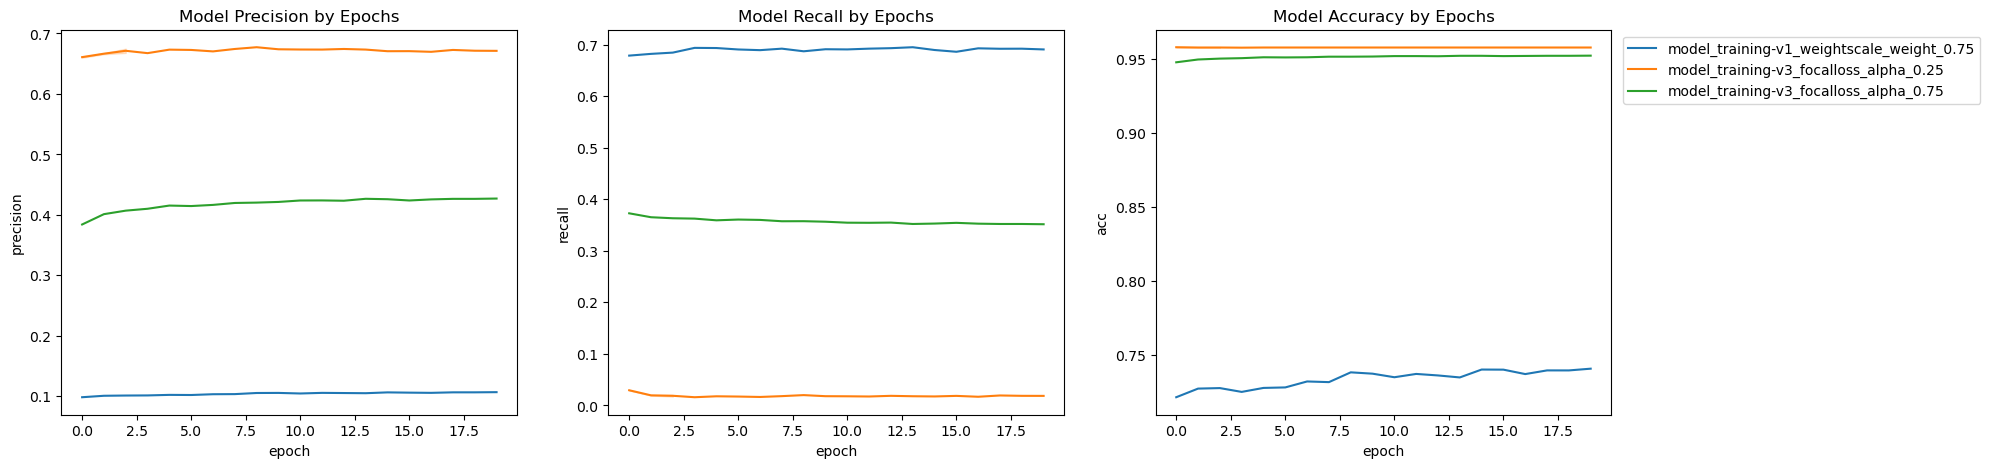

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,3,figsize=(20,5))

sns.lineplot(data=model_sum_df, x='epoch', y='precision', hue='model_with_parameter', ax=ax[0],legend=False)
sns.lineplot(data=model_sum_df, x='epoch', y='recall', hue='model_with_parameter', ax=ax[1],legend=False)
sns.lineplot(data=model_sum_df, x='epoch', y='acc', hue='model_with_parameter', ax=ax[2])

ax[0].set_title('Model Precision by Epochs')
ax[1].set_title('Model Recall by Epochs')
ax[2].set_title('Model Accuracy by Epochs')

plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.title('Model Accuracy by Epochs')
plt.show()

In [12]:
model_converged = model_sum_df[model_sum_df['epoch']>10].copy()
model_converged

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path
11,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,11,None,0.737076,0.105601,0.692259,models_v1\weight_0.75_epoch11_acc0.7371_prec0....
12,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,12,None,0.736055,0.105326,0.693170,models_v1\weight_0.75_epoch12_acc0.7361_prec0....
13,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,13,None,0.734706,0.105042,0.695019,models_v1\weight_0.75_epoch13_acc0.7347_prec0....
14,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,14,None,0.740039,0.106413,0.689611,models_v1\weight_0.75_epoch14_acc0.7400_prec0....
15,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,15,None,0.739971,0.105968,0.686196,models_v1\weight_0.75_epoch15_acc0.7400_prec0....
16,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,16,None,0.736977,0.105637,0.692887,models_v1\weight_0.75_epoch16_acc0.7370_prec0....
17,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,17,None,0.739466,0.106482,0.692030,models_v1\weight_0.75_epoch17_acc0.7395_prec0....
18,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,18,None,0.739450,0.106493,0.692173,models_v1\weight_0.75_epoch18_acc0.7394_prec0....
19,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,19,None,0.740630,0.106773,0.690727,models_v1\weight_0.75_epoch19_acc0.7406_prec0....
34,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.25,None,11,0.25,0.957800,0.673400,0.017400,models_v3\alpha_0.25_epoch11_acc0.9578_prec0.6...


In [13]:
acc_summary = model_converged[['model_with_parameter','acc']].groupby('model_with_parameter').mean().sort_values('acc',ascending=False)
acc_summary

,acc
model_with_parameter,
model_training-v3_focalloss_alpha_0.25,0.957800
model_training-v3_focalloss_alpha_0.75,0.952122
model_training-v1_weightscale_weight_0.75,0.738263


In [14]:
precision_summary = model_converged[['model_with_parameter','acc','precision','recall']].groupby('model_with_parameter').mean().sort_values('precision',ascending=False)
precision_summary

,acc,precision,recall
model_with_parameter,,,
model_training-v3_focalloss_alpha_0.25,0.957800,0.672000,0.018189
model_training-v3_focalloss_alpha_0.75,0.952122,0.425467,0.353000
model_training-v1_weightscale_weight_0.75,0.738263,0.105971,0.691563


In [15]:
max_precision_model = precision_summary['precision'].idxmax()
max_precision_model

'model_training-v3_focalloss_alpha_0.25'

In [16]:
recall_summary = precision_summary.sort_values('recall',ascending=False)
recall_summary

,acc,precision,recall
model_with_parameter,,,
model_training-v1_weightscale_weight_0.75,0.738263,0.105971,0.691563
model_training-v3_focalloss_alpha_0.75,0.952122,0.425467,0.353000
model_training-v3_focalloss_alpha_0.25,0.957800,0.672000,0.018189


In [17]:
max_recall_model = recall_summary['recall'].idxmax()
max_recall_model

'model_training-v1_weightscale_weight_0.75'

In [18]:
print('best model for precision:', max_precision_model, 'with precision of', precision_summary.loc[max_precision_model]['precision'], ', recall: ' ,  recall_summary.loc[max_precision_model]['recall'], ', acc: ', acc_summary.loc[max_precision_model]['acc']),print('best model for recall:', max_recall_model, 'with recall of', recall_summary.loc[max_recall_model]['recall'], 'precision: ', precision_summary.loc[max_recall_model]['precision'], ', acc: ', acc_summary.loc[max_recall_model]['acc'])

best model for precision: model_training-v3_focalloss_alpha_0.25 with precision of 0.672 , recall:  0.01818888888888889 , acc:  0.9578000000000001
best model for recall: model_training-v1_weightscale_weight_0.75 with recall of 0.6915632812032737 precision:  0.10597065826103506 , acc:  0.7382632163262008


(None, None)

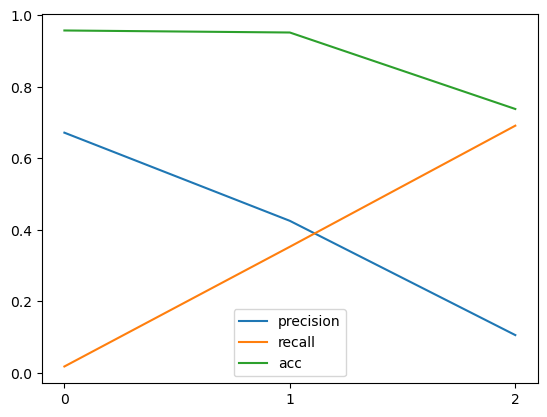

In [19]:
plt.plot(precision_summary.index, precision_summary[['precision','recall','acc']], label=['precision','recall','acc'])
plt.xticks(ticks= [i for i in range(len(precision_summary.index))],labels = [i for i in range(len(precision_summary.index))])
plt.legend()
plt.show()

In [20]:
# find the balanced model
def find_balance(row):
    if row['precision'] > row['recall'] :
        return row['recall'] / row['precision']
    elif row['recall'] > row['precision'] :
        return row['precision'] / row['recall']
    else:
        return 1.0

model_converged['p_r_ratio'] = model_converged.apply(find_balance, axis=1)

model_converged = model_converged.sort_values('p_r_ratio', ascending=False)
model_converged.head(10)

,model_name,model_with_parameter,weight,epoch,alpha,acc,precision,recall,path,p_r_ratio
55,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,12,0.75,0.95190,0.423400,0.354800,models_v3\alpha_0.75_epoch12_acc0.9519_prec0.4...,0.837978
54,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,11,0.75,0.95200,0.423900,0.354400,models_v3\alpha_0.75_epoch11_acc0.9520_prec0.4...,0.836046
58,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,15,0.75,0.95200,0.423800,0.354300,models_v3\alpha_0.75_epoch15_acc0.9520_prec0.4...,0.836008
59,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,16,0.75,0.95210,0.425600,0.352700,models_v3\alpha_0.75_epoch16_acc0.9521_prec0.4...,0.828712
57,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,14,0.75,0.95220,0.425900,0.352900,models_v3\alpha_0.75_epoch14_acc0.9522_prec0.4...,0.828598
61,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,18,0.75,0.95220,0.426500,0.352100,models_v3\alpha_0.75_epoch18_acc0.9522_prec0.4...,0.825557
60,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,17,0.75,0.95220,0.426500,0.352100,models_v3\alpha_0.75_epoch17_acc0.9522_prec0.4...,0.825557
56,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,13,0.75,0.95220,0.426600,0.352100,models_v3\alpha_0.75_epoch13_acc0.9522_prec0.4...,0.825363
62,model_training-v3_focalloss,model_training-v3_focalloss_alpha_0.75,None,19,0.75,0.95230,0.427000,0.351600,models_v3\alpha_0.75_epoch19_acc0.9523_prec0.4...,0.823419
19,model_training-v1_weightscale,model_training-v1_weightscale_weight_0.75,0.75,19,None,0.74063,0.106773,0.690727,models_v1\weight_0.75_epoch19_acc0.7406_prec0....,0.154581


In [100]:
# coppy the best model to current directory for easy access
import shutil
os.makedirs(os.path.join(current_dir, 'best_model'), exist_ok=True)
balance_model = model_converged.iloc[0]
shutil.copyfile(os.path.join(current_dir, balance_model['path']), os.path.join(current_dir, 'best_model', 'balance_model.pth'))
best_precision_model = model_converged[model_converged['model_with_parameter'] == max_precision_model].sort_values('precision', ascending=False).iloc[0]
shutil.copyfile(os.path.join(current_dir, best_precision_model['path']), os.path.join(current_dir, 'best_model', 'best_precision_model.pth'))
best_recall_model = model_converged[model_converged['model_with_parameter'] == max_recall_model].sort_values('recall', ascending=False).iloc[0]
shutil.copyfile(os.path.join(current_dir, best_recall_model['path']), os.path.join(current_dir, 'best_model','best_recall_model.pth'))

'e:\\iCloudDrive\\master of applied computing\\capstone project\\high_dense_low_rise\\best_model\\best_recall_model.pth'

In [101]:
model_sum_df.to_csv(os.path.join(current_dir, 'model_summary.csv'), index=False)